In [1]:
pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 316.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21712 sha256=666892fe02bcdc26d7f9864ff719347869e4bc232ad5af3b7d93377b24fec855
  Stored in directory: /root/.cache/pip/wheels/d4/bf/51/81d27ad638e1a6dca4f362ecc33d1e2c764b8ea7ec751b8fc1
Successfully built breadability
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import pandas as pd
from collections import Counter

# wordcloud
from PIL import Image
import numpy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#NLP Summarizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

#NLP Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer


# Textual Data Exploration

In [5]:
# Van Halen 1984 album

album_folder = "../input/1984data/1984-Data/1984-Van Halen"
songs = os.listdir(album_folder)
songs

['Top Jimmy.txt',
 'Girl Gone Bad.txt',
 'Panama.txt',
 'Drop Dead Legs.txt',
 'Hot for Teacher.txt',
 'Jump.txt',
 'House of Pain.txt']

In [7]:
album_corpus = []
#corpus is just a collection of textual data

for lyrics in songs: 
    with open(album_folder + '/' + lyrics, encoding='utf8') as f_input:
        album_corpus.append(f_input.read())

In [8]:
album_corpus

["[Intro]\n\nSome friends of mine, just the other night\nWent to hear this cool cat blow\nThe say he sang so good that the roof fell in, and they didn't even stop the show\nThey don't remember the place, but they remember the face, and now everybody wanna go\n\n[Chorus:]\nTop Jimmy cooks, Top Jimmy swings\nHe's got the look, oooh\nTop Jimmy, he's the king\n\nJimmy on the television, famous people laughing with him\nJimmy on the news at five\nJimmy on the radio and even on the video, that baddest cat alive\nDriving all the women crazy, only want Jimmy-baby\nLove it when he rolls his eyes\n\n[Chorus]\n\nWhoo, shake it baby!\n\n[Guitar solo]\n\nJuke-joint Jimmy is the latest thing, he's got the sound that everybody digs\nAnd the joint been jumpin' when the band been pumpin' and you know they're playing crazy gigs\nWell you ain't been living till you've seen the living end\nTop Jimmy and his Rhythm Pigs\n\n\n[Chorus]\n\nOh, Jimmy",
 "[Verse 1]\nAh lazy eyes in the summer heat\nFresh from o

In [ ]:
album_word_list = []

for lyrics in album_corpus:
    for word in lyrics.split():
        album_word_list.append(word)
        
album_word_list

In [13]:
len(album_word_list)


1133

In [14]:
album_word_count_unique = Counter(album_word_list)

len(album_word_count_unique)

493

# George Orwell 1984 Novel

In [ ]:
novel = '../input/1984data/1984-Data/1984-novel-George Orwell.txt'

novel_corpus = []

with open(novel, encoding='utf8') as f_input:
    novel_corpus.append(f_input.read())
    
novel_corpus

In [16]:
novel_word_list = novel_corpus[0].split()

In [17]:
len(novel_word_list)

103377

In [18]:
len(Counter(novel_word_list))
#unique words

15530

# -----------Creating Word Clouds-------------

In [19]:
stopwords = list(get_stop_words("english"))
#cleaning our lists of words by removing frequently used words in 
#the english language

In [20]:
stopwords

['seeming',
 "it's",
 'novel',
 'nowhere',
 'got',
 'took',
 'okay',
 'greetings',
 'however',
 'p',
 'everyone',
 'eg',
 'indicate',
 'tried',
 "who's",
 'consequently',
 'take',
 'by',
 'next',
 'can',
 "let's",
 'per',
 'while',
 "you've",
 "haven't",
 'hereupon',
 'now',
 'very',
 'unto',
 'entirely',
 'regarding',
 'beyond',
 're',
 'as',
 "what's",
 'inner',
 'throughout',
 't',
 'them',
 "isn't",
 'rd',
 'do',
 'almost',
 'does',
 'myself',
 'towards',
 'any',
 'described',
 'respectively',
 'useful',
 'namely',
 'this',
 'everybody',
 'sorry',
 'better',
 'did',
 'especially',
 'then',
 'nine',
 'specified',
 'no',
 'most',
 'whose',
 "she's",
 'shall',
 'particularly',
 'to',
 'unfortunately',
 'before',
 'outside',
 'away',
 'z',
 'went',
 'somewhat',
 'willing',
 'someone',
 'why',
 'same',
 'downwards',
 'via',
 'corresponding',
 'using',
 'un',
 "they're",
 'tries',
 'little',
 "mustn't",
 'seeing',
 'right',
 'various',
 'where',
 'clearly',
 'asking',
 'unless',
 'keep',

In [21]:
clean_album_word_list = []

for word in album_word_list:
    if word not in stopwords:
        clean_album_word_list.append(word)

In [ ]:
clean_album_word_list
#list of words in the album that are not in stopwords i.e. not in 
#the list of the most commonly appearing words in the 
#english language

In [24]:
#find frequency of newly cleaned list using nltk

import nltk

frequency_of_clean_album_words = nltk.FreqDist(clean_album_word_list)
#essentially the same as the 'Counter' function we used above

frequency_of_clean_album_words

FreqDist({'I': 28, '[Chorus]': 14, 'jump': 12, '[Verse': 10, 'bad': 10, 'Panama': 10, 'Jimmy': 8, "I'm": 8, 'You': 8, 'bad,': 8, ...})

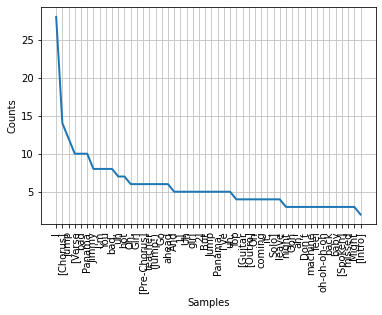

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
#plot frequency of clean album words 
frequency_of_clean_album_words.plot(50, cumulative=False)

<function matplotlib.pyplot.show(close=None, block=None)>

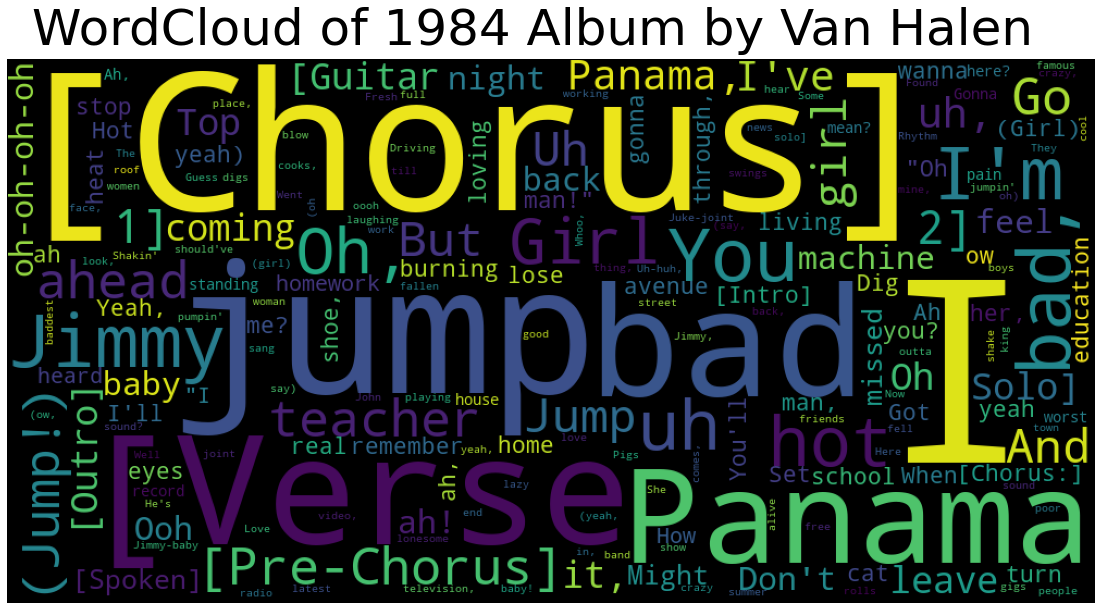

In [30]:
count_clean_album_word_list = Counter(clean_album_word_list)

wordcloud_1984_album = WordCloud(width=1000, height=500).generate_from_frequencies(count_clean_album_word_list)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"WordCloud of 1984 Album by Van Halen", fontsize=50, ha='center')
plt.imshow(wordcloud_1984_album)
plt.axis("off")
plt.show

# Novel WordCloud

In [33]:
clean_novel_word_list = []

for word in novel_word_list:
    if word not in stopwords:
        clean_novel_word_list.append(word)
        
frequency_of_clean_novel_word_list = nltk.FreqDist(clean_novel_word_list)

frequency_of_clean_novel_word_list

FreqDist({'The': 669, 'He': 646, 'It': 466, 'Winston': 316, 'I': 303, 'But': 218, 'Party': 193, 'There': 184, 'In': 173, 'They': 165, ...})

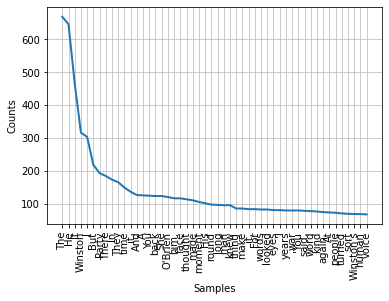

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
frequency_of_clean_novel_word_list.plot(50, cumulative=False)

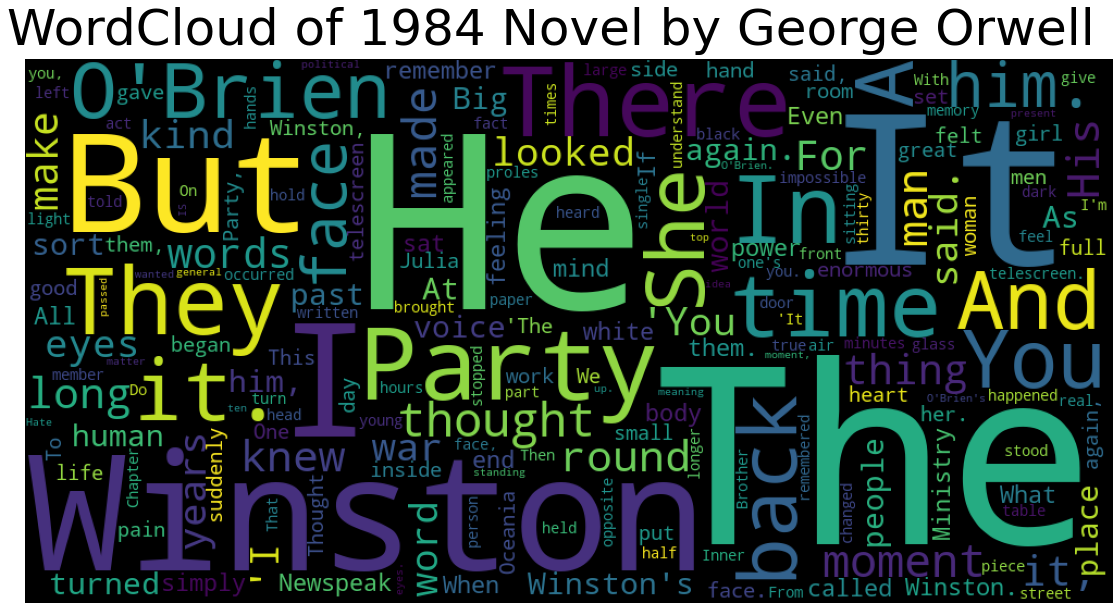

In [35]:
word_cloud_novel_word_list = Counter(clean_novel_word_list)
word_cloud_1984_novel = WordCloud(width = 1000, height=500).generate_from_frequencies(word_cloud_novel_word_list)

plt.figure(figsize=(20,10))
plt.figtext(.5,.9,"WordCloud of 1984 Novel by George Orwell", fontsize=50, ha='center')
plt.imshow(word_cloud_1984_novel)
plt.axis("off")
plt.show()

# -----------Text Summarization-----------

In [40]:
nltk.download('punkt')

lsa = LsaSummarizer(Stemmer('english'))
#LSA = Latent Semantic Analysis = theory used for 
#extracting and representing meanings behind words
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(album_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document,10)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_album = " ".join(lsa_summary_list)
print("Summary of 1984 album")
print(summary_album)


Summary of 1984 album
Juke-joint Jimmy is the latest thing, he's got the sound that everybody digs And the joint been jumpin' when the band been pumpin' and you know they're playing crazy gigs Well you ain't been living till you've seen the living end Top Jimmy and his Rhythm Pigs Oh, Jimmy [Verse 1] Ah lazy eyes in the summer heat Fresh from outta town Now she's working on the street Shakin' poor boys down [Verse 2] Found that girl with a lonesome John But she should've been with me Guess that woman fallen in love She don't work for free Here she comes, full blast and top down Hot shoe, burning down the avenue Model citizen, zero discipline [Verse 2] Ain't nothin' like it, her shiny machine Got the feel for the wheel, keep the moving parts clean Hot shoe, burning down the avenue Out an on-ramp coming through my bedroom [Spoken Interlude] Ah Yeah, we're running a little bit hot tonight I can barely see the road from the heat coming off it, I say I reach down between my legs and Ease th

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
nltk.download('punkt')

lsa = LsaSummarizer(Stemmer('english'))
#LSA = Latent Semantic Analysis = theory used for 
#extracting and representing meanings behind words
lsa.stop_words = get_stop_words('english')
parser = PlaintextParser.from_string(' '.join(novel_corpus), Tokenizer("english"))
lsa_summary = lsa(parser.document,20)
lsa_summary_list = [str(sentence) for sentence in lsa_summary]

summary_novel = " ".join(lsa_summary_list)
print("Summary of 1984 novel")
print(summary_novel)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Summary of 1984 novel
When one knew that any document was due for destruction, or even when one saw a scrap of waste paper lying about, it was an automatic action to lift the flap of the nearest memory hole and drop it in, whereupon it would be whirled away on a current of warm air to the enormous furnaces which were hidden somewhere in the recesses of the building. In the long, windowless hall, with its double row of cubicles and its endless rustle of papers and hum of voices murmuring into speakwrites, there were quite a dozen people whom Winston did not even know by name, though he daily saw them hurrying to and fro in the corridors or gesticulating in the Two Minutes Hate. And a few cubicles away a mild, ineffectual, dreamy creature named Ampleforth, with very hairy ears and a surprising talent for juggling with rhymes and metres, was engaged in producing garbled versions--definitive texts, they were called--of poems which had become ideologically offensive, but which for one reaso

# Sentiment Analysis Using NLTK's Pre-Trained Analyser

In [44]:
nltk.download('vader_lexicon')

sentiment_analyzer = SentimentIntensityAnalyzer()
print("Sentiment Analysis of 1984 Album")
print(sentiment_analyzer.polarity_scores(" ".join(album_corpus)))

Sentiment Analysis of 1984 Album
{'neg': 0.145, 'neu': 0.73, 'pos': 0.126, 'compound': -0.9909}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [45]:
print("Sentiment Analysis of 1984 Novel")
print(sentiment_analyzer.polarity_scores(" ".join(novel_corpus)))

Sentiment Analysis of 1984 Novel
{'neg': 0.106, 'neu': 0.798, 'pos': 0.096, 'compound': -1.0}
